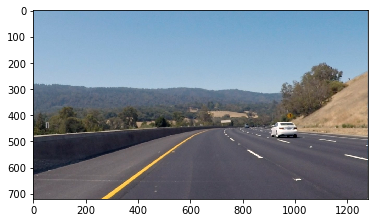

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
#read in the image
image = cv2.imread('images/curved_lane.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#convert to gray scale
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

plt.imshow(image)

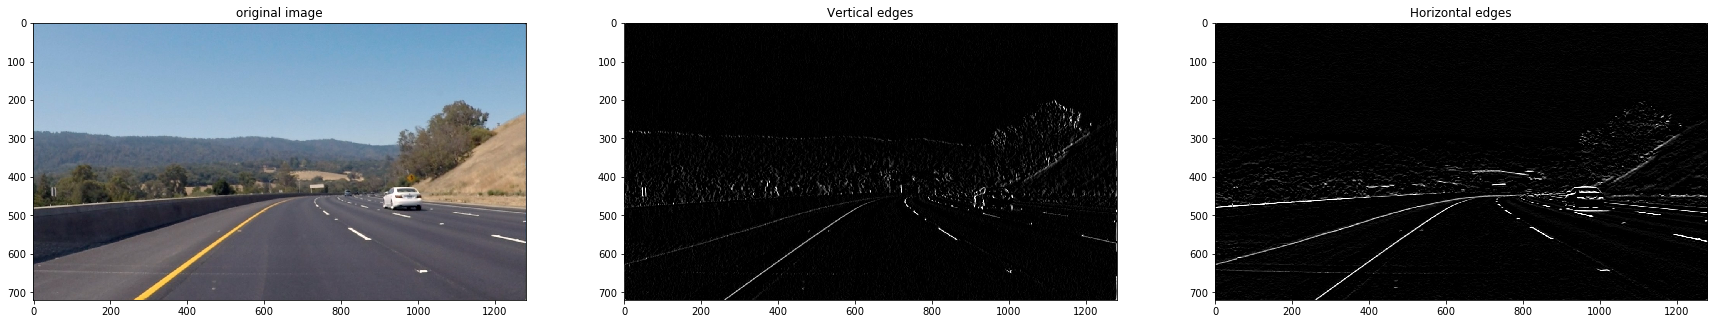

In [32]:
#create a custom filter in both x and y direction
sobel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])
sobel_y = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

#get filtered image using opencv function filter2D
vertical_edges = cv2.filter2D(gray_image,-1,sobel_x)
horizontal_edges = cv2.filter2D(gray_image,-1,sobel_y)

%matplotlib inline

f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,20))

ax1.set_title('original image')
ax1.imshow(image)
ax2.set_title('Vertical edges')
ax2.imshow(vertical_edges,cmap='gray')
ax3.set_title('Horizontal edges')
ax3.imshow(horizontal_edges,cmap='gray')

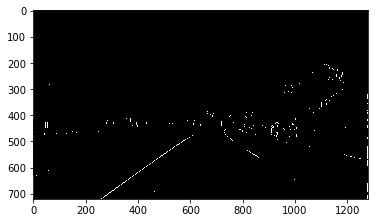

In [34]:
#create binary image
ret,binar = cv2.threshold(vertical_edges,100,255,cv2.THRESH_BINARY)
plt.imshow(binar,cmap='gray')

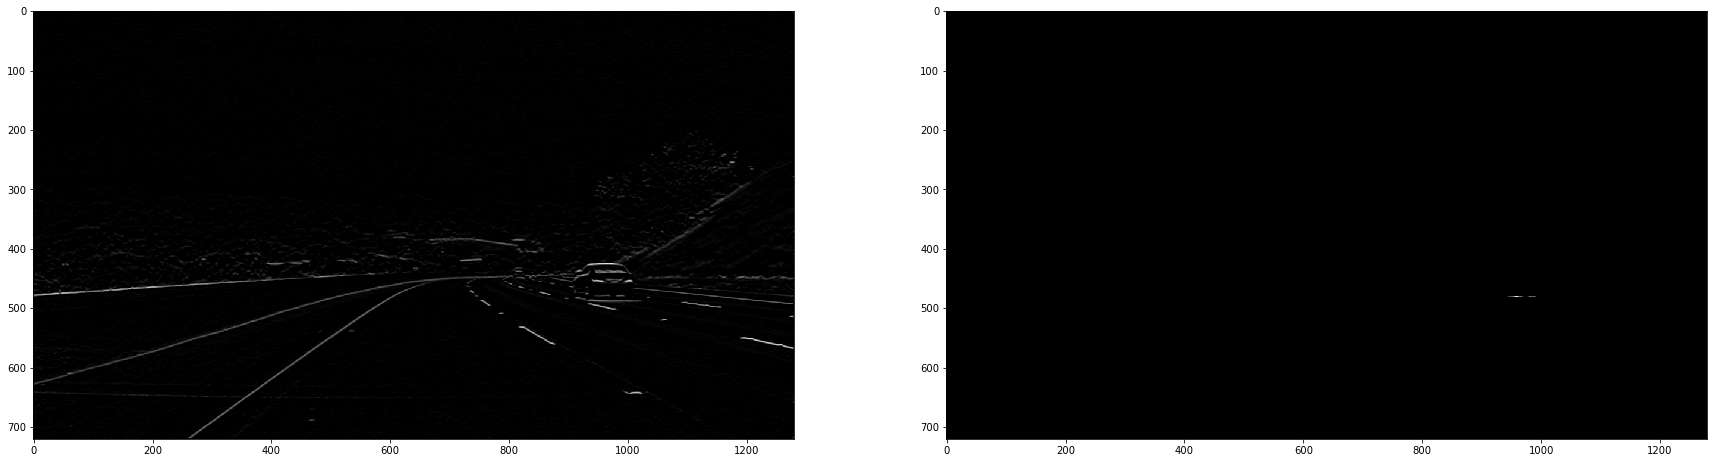

In [35]:
#Experiment with different filters
decimal_weight = np.array([
    [-0.1,-0.2,-0.1],
    [0,0,0],
    [0.1,0.2,0.1]
])

large_filter= np.array([
    [-0.1,-0.2,-0.1,-0.2,-0.1],
    [0,0,0,0,0],
    [0.1,0.2,0.1,0.2,0.1],
    [0,0,0,0,0],
    [-0.1,-0.2,-0.1,-0.2,-0.1]
])
filtered = cv2.filter2D(gray_image,-1,decimal_weight)
filtered_2 = cv2.filter2D(gray_image,-1,large_filter)

f,(ax1,ax2) = plt.subplots(1,2,figsize=(30,20))
ax1.imshow(filtered,cmap='gray')
ax2.imshow(filtered_2,cmap='gray')